In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn import preprocessing
import os
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px



In [2]:
# EXPORTAMOS EL DATASET DEFINITIVO SOBRE LE QUE VAMOS A TRABAJAR
df = pd.read_csv('DATASETS_analisis.csv')
df

,Date,NOMBRE,AREA,TIPO,SECTOR,PRECIO,PRECIO NORMALIADO MAX,PRECIO NORMALIADO MIN,RENTABILIDAD SEMANAL,RENTABILIDAD MENSUAL,RENTABILIDAD ANUAL,RENTABILIDAD BIANUAL,RENTABILIDAD LUSTRO,A 6 MESES,A 1 ANIO,A 2 ANIOS,A 5 ANIOS
0,2022-03-06,DAX,EUROPA,INDICE,NaN,13087.13,809.848657,13.981976,-0.000566,-0.151570,-0.097588,0.417571,0.093951,NaN,NaN,NaN,NaN
1,2022-02-27,DAX,EUROPA,INDICE,NaN,13094.54,810.307197,13.989893,-0.101096,-0.132787,-0.059347,0.134525,0.088729,NaN,NaN,NaN,NaN
2,2022-02-20,DAX,EUROPA,INDICE,NaN,14567.23,901.439173,15.563280,-0.031596,-0.049071,0.056646,0.225130,0.234090,NaN,NaN,NaN,NaN
3,2022-02-13,DAX,EUROPA,INDICE,NaN,15042.51,930.850119,16.071058,-0.024804,-0.035976,0.074985,0.107751,0.279449,NaN,NaN,NaN,NaN
4,2022-02-06,DAX,EUROPA,INDICE,NaN,15425.12,954.526524,16.479829,0.021561,-0.028843,0.097882,0.122299,0.322119,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46328,1987-08-09,CAC 40,EUROPA,INDICE,NaN,1486.49,205.899871,1.663075,0.012699,0.016675,NaN,NaN,NaN,-0.010125,-0.128605,0.229951,0.179598
46329,1987-08-02,CAC 40,EUROPA,INDICE,NaN,1467.85,203.317967,1.642221,-0.013747,NaN,NaN,NaN,NaN,0.012699,-0.097673,0.237810,0.210798
46330,1987-07-26,CAC 40,EUROPA,INDICE,NaN,1488.31,206.151967,1.665112,0.003209,NaN,NaN,NaN,NaN,-0.013747,-0.112718,0.225712,0.178968
46331,1987-07-19,CAC 40,EUROPA,INDICE,NaN,1483.55,205.492639,1.659786,0.014664,NaN,NaN,NaN,NaN,0.003209,-0.123360,0.200937,0.169236


In [3]:
# PRIMERO, VAMOS A ANALIZAR NUESTRO DATASET
# NOS CARGAMOS LA ÚLTIMAS 4 FILAS PORQUE FINALMENTE NO LA VAMOS A UTILIZAR
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df = df[df['NOMBRE']!='EURONEXT 100'] # FINALMENTE NO VAMOS A ANALIZAR ESTE ETF 
df.set_index('Date', inplace=True)
df.loc['2000':'2022'] # VAMOS A TOMAR VALORES DEL SIGLO XXI PARA TRATAR CON VALORES ACTUALIZADOS
df=df.iloc[:,:-4]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45175 entries, 2022-03-06 to 1987-07-12
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NOMBRE                 45175 non-null  object 
 1   AREA                   42455 non-null  object 
 2   TIPO                   45175 non-null  object 
 3   SECTOR                 27202 non-null  object 
 4   PRECIO                 45175 non-null  float64
 5   PRECIO NORMALIADO MAX  45175 non-null  float64
 6   PRECIO NORMALIADO MIN  45175 non-null  float64
 7   RENTABILIDAD SEMANAL   45140 non-null  float64
 8   RENTABILIDAD MENSUAL   45035 non-null  float64
 9   RENTABILIDAD ANUAL     43355 non-null  float64
 10  RENTABILIDAD BIANUAL   41535 non-null  float64
 11  RENTABILIDAD LUSTRO    36040 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.5+ MB


/var/folders/xg/mm8z7nf57pbbnsfb9kynnv4m0000gn/T/ipykernel_19092/162642303.py:6: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



> LOS VALORES NULL QUE EXISTEN SON: 
> * SECTORES: LOS INDICES NO TIENEN ESA COLUMNA RELLENADA
> * RENTABILIDAD '____': LAS COLUMNAS QUE MUESTRAN LAS RENTABILIDADES A 'X' TIEMPO 
> POSEEN VALORES NULOS EN SUS PRIMERAS FECHAS PORQUE NO SE CONOCEN EL VALOR ANTERIOR
> Y POR TANTO NO SE PUEDE CALCULAR. E INCLUIR UNA MEDIA O VALORES PRÓXIMOS, SERÍA 
> ALTERAR CALCUAQUIER CÁLCULO. DE ESTA MANERA, NO NOS AFECTA. 

### CÁLCULAMOS LA VARIACIONES MENSUALES PARA EXTRAER LOS PERÍODOS CON MAYORES CAÍDAS

In [4]:
# CALCULAMOS EL DATASETS DE INDICES
df_indices = df[(df['TIPO']=='INDICE')|(df['NOMBRE']=='GOLD SPOT US DOLLAR')]
df_indices['DATE'] = df_indices.index
df_indices # TENEMOS NUESTRO DATAFRAME CON VALORES DE INDICES. 

/var/folders/xg/mm8z7nf57pbbnsfb9kynnv4m0000gn/T/ipykernel_19092/3840506029.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NOMBRE,AREA,TIPO,SECTOR,PRECIO,PRECIO NORMALIADO MAX,PRECIO NORMALIADO MIN,RENTABILIDAD SEMANAL,RENTABILIDAD MENSUAL,RENTABILIDAD ANUAL,RENTABILIDAD BIANUAL,RENTABILIDAD LUSTRO,DATE
Date,,,,,,,,,,,,,
2022-03-06,DAX,EUROPA,INDICE,NaN,13087.13,809.848657,13.981976,-0.000566,-0.151570,-0.097588,0.417571,0.093951,2022-03-06
2022-02-27,DAX,EUROPA,INDICE,NaN,13094.54,810.307197,13.989893,-0.101096,-0.132787,-0.059347,0.134525,0.088729,2022-02-27
2022-02-20,DAX,EUROPA,INDICE,NaN,14567.23,901.439173,15.563280,-0.031596,-0.049071,0.056646,0.225130,0.234090,2022-02-20
2022-02-13,DAX,EUROPA,INDICE,NaN,15042.51,930.850119,16.071058,-0.024804,-0.035976,0.074985,0.107751,0.279449,2022-02-13
2022-02-06,DAX,EUROPA,INDICE,NaN,15425.12,954.526524,16.479829,0.021561,-0.028843,0.097882,0.122299,0.322119,2022-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987-08-09,CAC 40,EUROPA,INDICE,NaN,1486.49,205.899871,1.663075,0.012699,0.016675,NaN,NaN,NaN,1987-08-09
1987-08-02,CAC 40,EUROPA,INDICE,NaN,1467.85,203.317967,1.642221,-0.013747,NaN,NaN,NaN,NaN,1987-08-02
1987-07-26,CAC 40,EUROPA,INDICE,NaN,1488.31,206.151967,1.665112,0.003209,NaN,NaN,NaN,NaN,1987-07-26


In [5]:
df_rm = pd.pivot_table(df_indices, values ='RENTABILIDAD MENSUAL', columns = 'NOMBRE',index='Date')
df_rm.dropna(how='any', inplace=True)
df_rm['media_mensual']=(df_rm['DAX']+df_rm['DOW JONES INDUSTRIAL']+ df_rm['IBEX 35']+ df_rm['NASDAQ 100']+df_rm['NYSE COMPOSITE']+df_rm['S&P 500']+df_rm['CAC 40'])/7
df_top5 = df_rm.sort_values(['media_mensual'])
df_top5.head(20)

NOMBRE,CAC 40,DAX,DOW JONES INDUSTRIAL,GOLD SPOT US DOLLAR,IBEX 35,NASDAQ 100,NYSE COMPOSITE,S&P 500,media_mensual
Date,,,,,,,,,
2020-03-15,-0.328526,-0.342460,-0.338655,-0.088495,-0.348253,-0.259604,-0.346499,-0.309439,-0.324777
2008-10-19,-0.232885,-0.291553,-0.248061,-0.164337,-0.266485,-0.280956,-0.312139,-0.277350,-0.272776
2008-10-05,-0.266850,-0.271148,-0.260095,0.113742,-0.211558,-0.281434,-0.295076,-0.281601,-0.266823
2020-03-08,-0.321450,-0.328293,-0.211322,-0.034707,-0.334164,-0.169201,-0.230207,-0.197961,-0.256085
2001-09-16,-0.257027,-0.297034,-0.209856,0.069086,-0.239117,-0.286569,-0.171487,-0.184931,-0.235146
2008-10-12,-0.230053,-0.227513,-0.222701,-0.102445,-0.164623,-0.248324,-0.273394,-0.250606,-0.231031
2009-03-01,-0.188402,-0.210613,-0.199702,0.028303,-0.188163,-0.166569,-0.217486,-0.213240,-0.197739
2011-08-14,-0.214878,-0.252019,-0.146951,0.158324,-0.190610,-0.161054,-0.171035,-0.164674,-0.185889
2020-03-29,-0.191576,-0.174677,-0.186054,-0.033317,-0.214194,-0.117490,-0.200081,-0.162739,-0.178116


> LAS FECHAS CON MAYORES CAÍDAS MENSUALES ORDENADAS SON: 
> - MARZO 2020: COVID-19
> - OCTUBRE 2008: CRISIS FINANCIERA
> - SEPTIEMBRE 2001: CRISIS TECNOLÓGICA

In [6]:
# MOSTRAMOS EL GRÁFICO DE TODOS LOS ÍNDICES EN ESTOS ÚLTIMOS 20 AÑOS. 
# PASAMOS LOS VALORES A UNA PIVOT TABLE ORGANIZADOS POR NOMBRE.
df_precio_ind = pd.pivot_table(df_indices, values ='PRECIO', columns = 'NOMBRE',index='Date')
df_precio_ind.dropna(how='any', inplace=True)
df_precio_ind

NOMBRE,CAC 40,DAX,DOW JONES INDUSTRIAL,GOLD SPOT US DOLLAR,IBEX 35,NASDAQ 100,NYSE COMPOSITE,S&P 500
Date,,,,,,,,
1991-09-08,1876.19,1633.65,2985.69,344.45,2772.87,279.50,2226.6,383.59
1991-09-15,1885.49,1616.13,3019.23,348.55,2842.63,286.63,2252.0,387.92
1991-09-22,1883.80,1612.80,3006.04,349.25,2847.50,285.94,2243.9,385.90
1991-09-29,1851.91,1604.89,2961.76,358.85,2740.89,280.51,2222.8,381.25
1991-10-06,1833.82,1569.71,2983.68,359.50,2744.07,281.50,2221.2,381.45
...,...,...,...,...,...,...,...,...
2022-01-30,6951.38,15099.56,35089.74,1807.49,8589.30,14694.35,16701.6,4500.54
2022-02-06,7011.60,15425.12,34737.47,1859.96,8798.10,14253.84,16665.0,4418.64
2022-02-13,6929.63,15042.51,34079.12,1897.87,8590.00,14009.54,16392.3,4348.87


,DAX,DOW JONES INDUSTRIAL,IBEX 35,NASDAQ 100,NYSE COMPOSITE,S&P 500,CAC 40
Date,,,,,,,
1991-09-08,-1.351194,-1.311500,-1.874440,-0.866085,-1.576845,-1.224187,-1.615529
1991-09-15,-1.355878,-1.307107,-1.851221,-0.863911,-1.569598,-1.219440,-1.608569
1991-09-22,-1.356768,-1.308835,-1.849600,-0.864121,-1.571909,-1.221654,-1.609834
1991-09-29,-1.358883,-1.314635,-1.885084,-0.865777,-1.577929,-1.226752,-1.633701
1991-10-06,-1.368288,-1.311764,-1.884026,-0.865475,-1.578385,-1.226533,-1.647240
...,...,...,...,...,...,...,...
2022-01-30,2.248883,2.893654,0.061513,3.529039,2.553076,3.289058,2.182835
2022-02-06,2.335921,2.847512,0.131010,3.394726,2.542634,3.199275,2.227905
2022-02-13,2.233631,2.761278,0.061746,3.320239,2.464829,3.122789,2.166557


<AxesSubplot:xlabel='Date'>

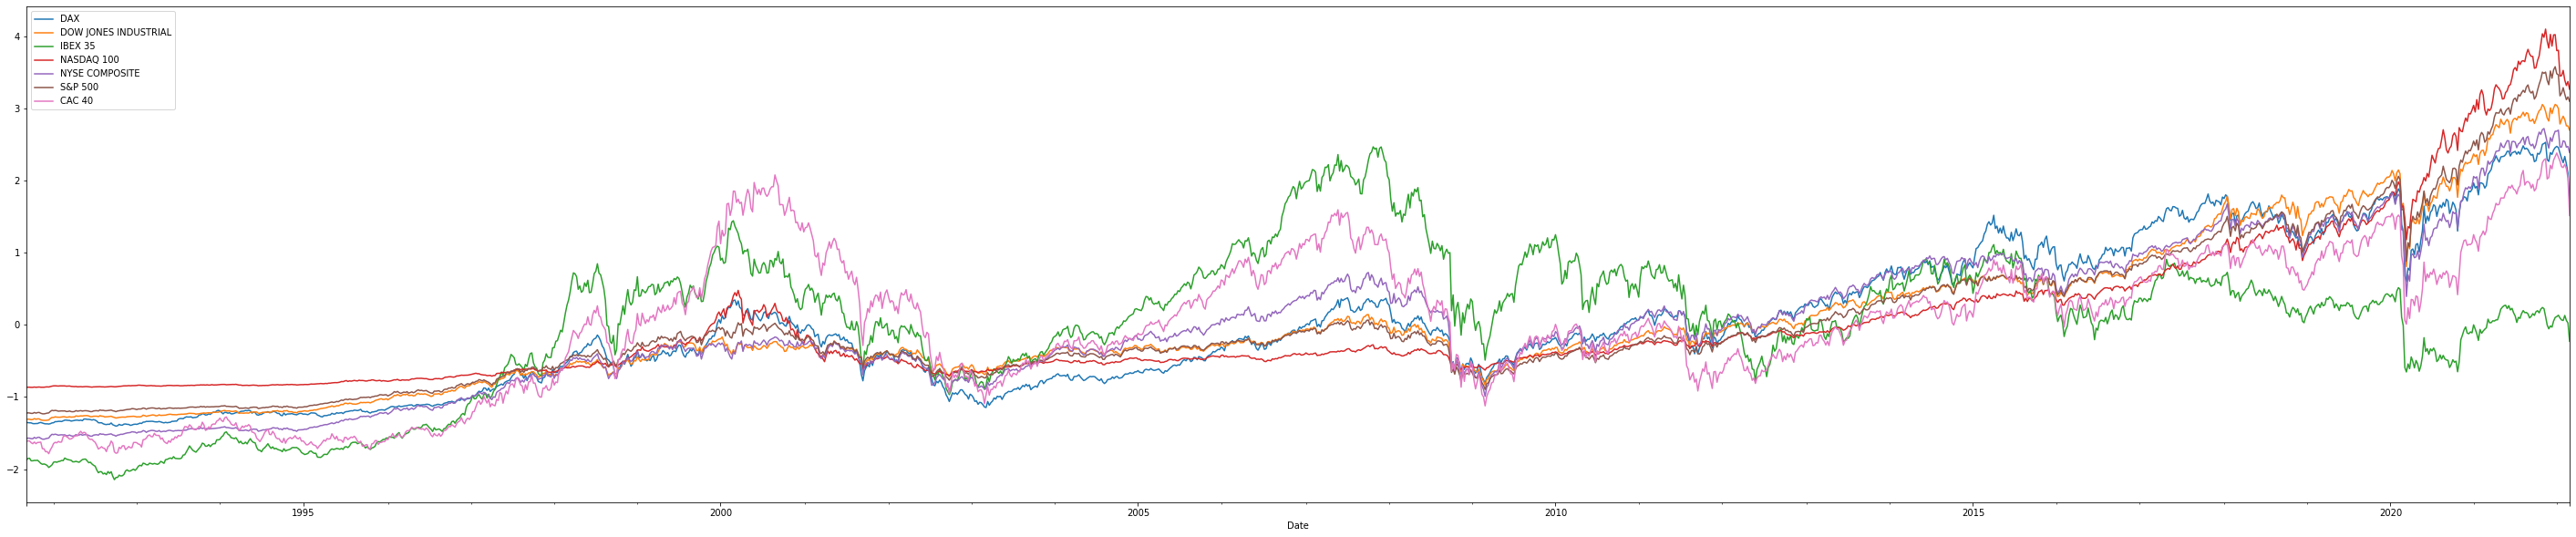

In [7]:
std_scale = preprocessing.StandardScaler().fit(df_precio_ind[['DAX', 'DOW JONES INDUSTRIAL',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500', 'CAC 40']])
df_std_rus = std_scale.transform(df_precio_ind[['DAX', 'DOW JONES INDUSTRIAL',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500', 'CAC 40']])

df_precio_ind_dosmil_norm = pd.DataFrame(df_std_rus, columns=['DAX', 'DOW JONES INDUSTRIAL',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500','CAC 40'])


df_precio_ind_dosmil_norm['Date']= df_precio_ind.index
df_precio_ind_dosmil_norm['Date']=pd.to_datetime(df_precio_ind_dosmil_norm['Date'], format="%Y-%m-%d")
df_precio_ind_dosmil_norm.set_index('Date', inplace=True)
display(df_precio_ind_dosmil_norm)# DESPLEGAMOS DATAFRAME
figura_200 = df_precio_ind_dosmil_norm.plot(figsize=(50,10))
figura_200 # MOSTRAMOS GRÁFICO CON LAS VARIACIONES DEL 2000-2020


In [8]:
# CADA VEZ QUE VAYAMOS A DESPLEGAR UN GRÁFICO DE CADA UNO DE LOS PERÍODOS A ANALIZAR, DEBEMOS ESTANDARIZAR LOS PREICOS
# PARA QUE SALGAN CENTRADOS LOS VALORES

## GRÁFICO CRISIS TECNOLÓGICA (2001-2003)

In [9]:
df_precio_ind_2001 = df_precio_ind.loc['03-2001':'12-2003']
df_precio_ind_2001.index

DatetimeIndex(['2001-03-04', '2001-03-11', '2001-03-18', '2001-03-25',
               '2001-04-01', '2001-04-08', '2001-04-15', '2001-04-22',
               '2001-04-29', '2001-05-06',
               ...
               '2003-10-26', '2003-11-02', '2003-11-09', '2003-11-16',
               '2003-11-23', '2003-11-30', '2003-12-07', '2003-12-14',
               '2003-12-21', '2003-12-28'],
              dtype='datetime64[ns]', name='Date', length=148, freq=None)

In [10]:
# ESTANDARIZACIÓN PRECIOS
std_scale = preprocessing.StandardScaler().fit(df_precio_ind_2001[['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500', 'CAC 40']])
df_std_2001 = std_scale.transform(df_precio_ind_2001[['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500', 'CAC 40']])

df_precio_ind_2001_norm = pd.DataFrame(df_std_2001, columns=['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500','CAC 40'])

df_precio_ind_2001_norm['Date']= df_precio_ind_2001.index
df_precio_ind_2001_norm.set_index('Date', inplace=True)

In [11]:
# Creating trace1
trace1 = go.Scatter(
                    x = df_precio_ind_2001_norm.index,
                    y = df_precio_ind_2001_norm['DAX'],
                    name = 'DAX',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(31, 119, 180,0.5)',size=5),
                    opacity=0.5)

# Creating trace2
trace2 = go.Scatter(
                    x = df_precio_ind_2001_norm.index,
                    y = df_precio_ind_2001_norm['CAC 40'],
                    name = 'CAC 40',
                    mode= 'lines+markers',
                    marker = dict(color = 'green',size=5),
                    opacity=0.5)

trace3 = go.Scatter(
                    x = df_precio_ind_2001_norm.index,
                    y = df_precio_ind_2001_norm['DOW JONES INDUSTRIAL'],
                    name = 'DOW JONES INDUSTRIAL',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(255, 127, 14,0.5)',size=5),
                    opacity=0.5)

trace4 = go.Scatter(
                    x = df_precio_ind_2001_norm.index,
                    y = df_precio_ind_2001_norm['IBEX 35'],
                    name = 'IBEX 35',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(214, 39, 40,0.5)',size=5),
                    opacity=0.5)

trace5 = go.Scatter(
                    x = df_precio_ind_2001_norm.index,
                    y = df_precio_ind_2001_norm['NASDAQ 100'],
                    name = 'NASDAQ 100',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(140, 86, 75,0.5)',size=5),
                    opacity=0.5)
trace6 = go.Scatter(
                    x = df_precio_ind_2001_norm.index,
                    y = df_precio_ind_2001_norm['NYSE COMPOSITE'],
                    name = 'NYSE COMPOSITE',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(127, 127, 127,0.5)',size=5),
                    opacity=0.5)
trace7 = go.Scatter(
                    x = df_precio_ind_2001_norm.index,
                    y = df_precio_ind_2001_norm['S&P 500'],
                    name = 'S&P 500',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(23, 190, 207,0.5)',size=5),
                    opacity=0.5)
trace8 = go.Scatter(
                    x = df_precio_ind_2001_norm.index,
                    y = df_precio_ind_2001_norm['GOLD SPOT US DOLLAR'],
                    name = 'GOLD SPOT US DOLLAR',
                    mode= 'lines+markers',
                    marker = dict(color = 'gold', size=5),
                    )

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8]


          

fig2001 = go.Figure(data = data)
fig2001.update_layout(template='plotly_dark')
fig2001.show()

## GRÁFICO CRISIS TECNOLÓGICA(2008-2013)


In [12]:
# SELECCION DE LOS PRECIOS ENTRE 2017 Y 2013
df_precio_ind_2008 = df_precio_ind.loc['10-2007':'12-2013']
df_precio_ind_2008.index

DatetimeIndex(['2007-10-07', '2007-10-14', '2007-10-21', '2007-10-28',
               '2007-11-04', '2007-11-11', '2007-11-18', '2007-11-25',
               '2007-12-02', '2007-12-09',
               ...
               '2013-10-27', '2013-11-03', '2013-11-10', '2013-11-17',
               '2013-11-24', '2013-12-01', '2013-12-08', '2013-12-15',
               '2013-12-22', '2013-12-29'],
              dtype='datetime64[ns]', name='Date', length=326, freq=None)

In [13]:
# ESTANDARIZACIÓN PRECIOS DEL PERIODO
std_scale = preprocessing.StandardScaler().fit(df_precio_ind_2008[['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500', 'CAC 40']])
df_std_2008 = std_scale.transform(df_precio_ind_2008[['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500', 'CAC 40']])

df_precio_ind_2008_norm = pd.DataFrame(df_std_2008, columns=['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500','CAC 40'])

df_precio_ind_2008_norm['Date']= df_precio_ind_2008.index
df_precio_ind_2008_norm.set_index('Date', inplace=True)


In [14]:
# Creating trace1
trace1 = go.Scatter(
                    x = df_precio_ind_2008_norm.index,
                    y = df_precio_ind_2008_norm['DAX'],
                    name = 'DAX',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(31, 119, 180,0.5)',size=5),
                    opacity=0.5)

# Creating trace2
trace2 = go.Scatter(
                    x = df_precio_ind_2008_norm.index,
                    y = df_precio_ind_2008_norm['CAC 40'],
                    name = 'CAC 40',
                    mode= 'lines+markers',
                    marker = dict(color = 'green',size=5),
                    opacity=0.5)

trace3 = go.Scatter(
                    x = df_precio_ind_2008_norm.index,
                    y = df_precio_ind_2008_norm['DOW JONES INDUSTRIAL'],
                    name = 'DOW JONES INDUSTRIAL',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(255, 127, 14,0.5)',size=5),
                    opacity=0.5)

trace4 = go.Scatter(
                    x = df_precio_ind_2008_norm.index,
                    y = df_precio_ind_2008_norm['IBEX 35'],
                    name = 'IBEX 35',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(214, 39, 40,0.5)',size=5),
                    opacity=0.5)

trace5 = go.Scatter(
                    x = df_precio_ind_2008_norm.index,
                    y = df_precio_ind_2008_norm['NASDAQ 100'],
                    name = 'NASDAQ 100',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(140, 86, 75,0.5)',size=5),
                    opacity=0.5)
trace6 = go.Scatter(
                    x = df_precio_ind_2008_norm.index,
                    y = df_precio_ind_2008_norm['NYSE COMPOSITE'],
                    name = 'NYSE COMPOSITE',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(127, 127, 127,0.5)',size=5),
                    opacity=0.5)
trace7 = go.Scatter(
                    x = df_precio_ind_2008_norm.index,
                    y = df_precio_ind_2008_norm['S&P 500'],
                    name = 'S&P 500',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(23, 190, 207,0.5)',size=5),
                    opacity=0.5)
trace8 = go.Scatter(
                    x = df_precio_ind_2008_norm.index,
                    y = df_precio_ind_2008_norm['GOLD SPOT US DOLLAR'],
                    name = 'GOLD SPOT US DOLLAR',
                    mode= 'lines+markers',
                    marker = dict(color = 'gold', size=5),
                    )

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8]

layout = dict(title = 'MOVIMIENTOS 2008 - 2013',
             xaxis= dict(title= 'CRISIS 2008',ticklen= 5)
           )

fig_dosocho = go.Figure(data = data)
fig_dosocho.update_layout(template='plotly_dark')
fig_dosocho.show()

## GRÁFICO CRISIS COVID-19(2019-2021)


In [15]:
df_precio_ind_covid = df_precio_ind.loc['10-2019':'12-2021']
df_precio_ind_covid.index

DatetimeIndex(['2019-10-06', '2019-10-13', '2019-10-20', '2019-10-27',
               '2019-11-03', '2019-11-10', '2019-11-17', '2019-11-24',
               '2019-12-01', '2019-12-08',
               ...
               '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14',
               '2021-11-21', '2021-11-28', '2021-12-05', '2021-12-12',
               '2021-12-19', '2021-12-26'],
              dtype='datetime64[ns]', name='Date', length=117, freq=None)

In [16]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df_precio_ind_covid[['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500', 'CAC 40']])
df_std_covid = std_scale.transform(df_precio_ind_covid[['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500', 'CAC 40']])

df_precio_ind_cov_norm = pd.DataFrame(df_std_covid, columns=['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500','CAC 40'])

df_precio_ind_cov_norm['Date']= df_precio_ind_covid.index
df_precio_ind_cov_norm.set_index('Date', inplace=True)


In [17]:
# Creating trace1
trace1 = go.Scatter(
                    x = df_precio_ind_cov_norm.index,
                    y = df_precio_ind_cov_norm['DAX'],
                    name = 'DAX',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(31, 119, 180,0.5)',size=5),
                    opacity=0.5)

# Creating trace2
trace2 = go.Scatter(
                    x = df_precio_ind_cov_norm.index,
                    y = df_precio_ind_cov_norm['CAC 40'],
                    name = 'CAC 40',
                    mode= 'lines+markers',
                    marker = dict(color = 'green',size=5),
                    opacity=0.5)

trace3 = go.Scatter(
                    x = df_precio_ind_cov_norm.index,
                    y = df_precio_ind_cov_norm['DOW JONES INDUSTRIAL'],
                    name = 'DOW JONES INDUSTRIAL',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(255, 127, 14,0.5)',size=5),
                    opacity=0.5)

trace4 = go.Scatter(
                    x = df_precio_ind_cov_norm.index,
                    y = df_precio_ind_cov_norm['IBEX 35'],
                    name = 'IBEX 35',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(214, 39, 40,0.5)',size=5),
                    opacity=0.5)

trace5 = go.Scatter(
                    x = df_precio_ind_cov_norm.index,
                    y = df_precio_ind_cov_norm['NASDAQ 100'],
                    name = 'NASDAQ 100',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(140, 86, 75,0.5)',size=5),
                    opacity=0.5)
trace6 = go.Scatter(
                    x = df_precio_ind_cov_norm.index,
                    y = df_precio_ind_cov_norm['NYSE COMPOSITE'],
                    name = 'NYSE COMPOSITE',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(127, 127, 127,0.5)',size=5),
                    opacity=0.5)
trace7 = go.Scatter(
                    x = df_precio_ind_cov_norm.index,
                    y = df_precio_ind_cov_norm['S&P 500'],
                    name = 'S&P 500',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(23, 190, 207,0.5)',size=5),
                    opacity=0.5)
trace8 = go.Scatter(
                    x = df_precio_ind_cov_norm.index,
                    y = df_precio_ind_cov_norm['GOLD SPOT US DOLLAR'],
                    name = 'GOLD SPOT US DOLLAR',
                    mode= 'lines+markers',
                    marker = dict(color = 'gold', size=5),
                    )

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8]


          

figure_ppt = go.Figure(data = data)
figure_ppt.update_layout(template='plotly_dark')
figure_ppt.show()

## GRÁFICO CRISIS COVID-19(2019-2021)


In [18]:
df_precio_ind_rus = df_precio_ind.loc['10-2021':'12-2022']
df_precio_ind_rus.index

DatetimeIndex(['2021-10-03', '2021-10-10', '2021-10-17', '2021-10-24',
               '2021-10-31', '2021-11-07', '2021-11-14', '2021-11-21',
               '2021-11-28', '2021-12-05', '2021-12-12', '2021-12-19',
               '2021-12-26', '2022-01-02', '2022-01-09', '2022-01-16',
               '2022-01-23', '2022-01-30', '2022-02-06', '2022-02-13',
               '2022-02-20', '2022-02-27'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [19]:
std_scale = preprocessing.StandardScaler().fit(df_precio_ind_rus[['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500', 'CAC 40']])
df_std_rus = std_scale.transform(df_precio_ind_rus[['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500', 'CAC 40']])

df_precio_ind_rus_norm = pd.DataFrame(df_std_rus, columns=['DAX', 'DOW JONES INDUSTRIAL', 'GOLD SPOT US DOLLAR',
       'IBEX 35', 'NASDAQ 100', 'NYSE COMPOSITE', 'S&P 500','CAC 40'])


df_precio_ind_rus_norm['Date']= df_precio_ind_rus.index
df_precio_ind_rus_norm['Date']=pd.to_datetime(df_precio_ind_rus_norm['Date'], format="%Y-%m-%d")
df_precio_ind_rus_norm.set_index('Date', inplace=True)


In [20]:
# Creating trace1
trace1 = go.Scatter(
                    x = df_precio_ind_rus_norm.index,
                    y = df_precio_ind_rus_norm['DAX'],
                    name = 'DAX',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(31, 119, 180,0.5)',size=5))

# Creating trace2
trace2 = go.Scatter(
                    x = df_precio_ind_rus_norm.index,
                    y = df_precio_ind_rus_norm['CAC 40'],
                    name = 'CAC 40',
                    mode= 'lines+markers',
                    marker = dict(color = 'green',size=5))

trace3 = go.Scatter(
                    x = df_precio_ind_rus_norm.index,
                    y = df_precio_ind_rus_norm['DOW JONES INDUSTRIAL'],
                    name = 'DOW JONES INDUSTRIAL',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(255, 127, 14,0.5)',size=5))

trace4 = go.Scatter(
                    x = df_precio_ind_rus_norm.index,
                    y = df_precio_ind_rus_norm['IBEX 35'],
                    name = 'IBEX 35',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(214, 39, 40,0.5)',size=5))

trace5 = go.Scatter(
                    x = df_precio_ind_rus_norm.index,
                    y = df_precio_ind_rus_norm['NASDAQ 100'],
                    name = 'NASDAQ 100',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(140, 86, 75,0.5)',size=5))
trace6 = go.Scatter(
                    x = df_precio_ind_rus_norm.index,
                    y = df_precio_ind_rus_norm['NYSE COMPOSITE'],
                    name = 'NYSE COMPOSITE',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(127, 127, 127,0.5)',size=5))
trace7 = go.Scatter(
                    x = df_precio_ind_rus_norm.index,
                    y = df_precio_ind_rus_norm['S&P 500'],
                    name = 'S&P 500',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(23, 190, 207,0.5)',size=5))
trace8 = go.Scatter(
                    x = df_precio_ind_rus_norm.index,
                    y = df_precio_ind_rus_norm['GOLD SPOT US DOLLAR'],
                    name = 'GOLD SPOT US DOLLAR',
                    mode= 'lines+markers',
                    marker = dict(color = 'gold', size=5),
                    )

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8]

layout = dict(title = 'CONFLICTO RUSIA - UCRANIA')
           

figure_ppt = go.Figure(data = data, layout=layout)
figure_ppt.update_layout(template='plotly_dark')
figure_ppt.show()

# GRÁFICO COEFICIENTE DE CORRELACIÓN

In [21]:
df_rm_coef = df_rm.drop(columns={'media_mensual'})


In [22]:
df_rm_coef

NOMBRE,CAC 40,DAX,DOW JONES INDUSTRIAL,GOLD SPOT US DOLLAR,IBEX 35,NASDAQ 100,NYSE COMPOSITE,S&P 500
Date,,,,,,,,
1991-10-06,-0.022583,-0.039139,-0.000673,0.043693,-0.010386,0.007156,-0.002425,-0.005579
1991-10-13,-0.011291,-0.031526,0.019184,0.038732,-0.029286,0.022608,0.014876,0.011807
1991-10-20,-0.026011,-0.025254,-0.000373,0.032212,-0.032098,-0.010492,-0.001872,-0.004405
1991-10-27,0.002570,-0.020132,0.031937,-0.009753,0.008826,0.033831,0.027533,0.026413
1991-11-03,0.012940,0.025782,0.020760,-0.015299,-0.014602,0.049911,0.032145,0.029991
...,...,...,...,...,...,...,...,...
2022-01-30,-0.037136,-0.053185,-0.031517,0.006605,-0.018568,-0.057583,-0.027070,-0.037733
2022-02-06,-0.018396,-0.028843,-0.032701,0.023519,-0.000965,-0.086971,-0.032179,-0.052374
2022-02-13,-0.019659,-0.035976,-0.005436,0.035255,-0.012042,-0.029703,-0.000305,-0.011155


In [23]:
df_rm_coef = df_rm_coef.loc['2000':'2022']

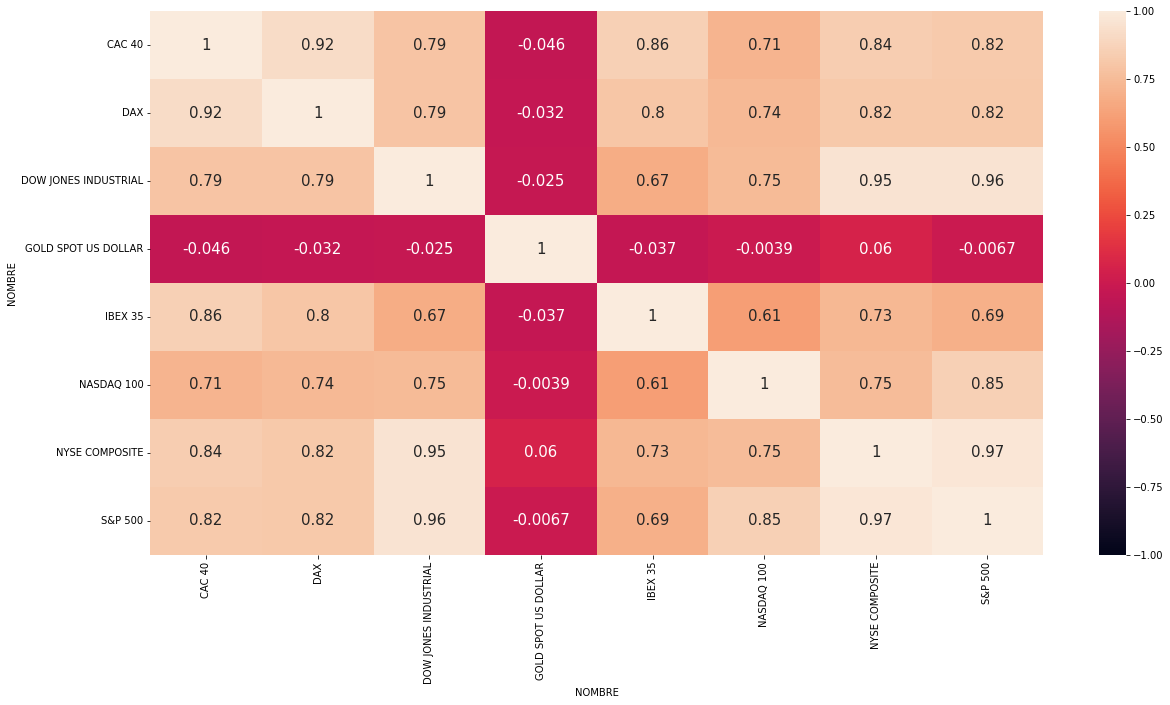

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df_rm_coef.corr(),vmin=-1,
            vmax=1, annot=True, annot_kws={"fontsize":15});

## GRÁFICO RENTABILIDADES INDICES (2000-2021)

In [25]:
df_ra = pd.pivot_table(df_indices, values ='RENTABILIDAD ANUAL', columns = 'NOMBRE',index='Date')
df_ra.dropna(how='any', inplace=True)
df_ra['Date']=df_ra.index
df_ra['week'] = df_ra['Date'].dt.week #CREAMOS UNA COLUMNA DONDE INDICAMOS LA SEMANA DEL AÑO
df_ra['year'] = df_ra['Date'].dt.year
# COGEMOS LA PENÚLTIMA PARA ASEGURARNOS, QUE ESTÁ DENTRO DEL AÑO.
# EL AÑO TIENE 52 SEMANAS, PERO SI COGEMOS LA 52 PUEDE QUE YA PERTENEZCA AL PRÓXIMO AÑO.
df_ra_limpieza = df_ra[df_ra['week']==51]  
df_ra_limpieza=df_ra_limpieza.set_index('year')
df_ra_limpieza.drop(['week','Date'],axis = 1,inplace=True)
df_ra_limpieza

/var/folders/xg/mm8z7nf57pbbnsfb9kynnv4m0000gn/T/ipykernel_19092/1842163071.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



NOMBRE,CAC 40,DAX,DOW JONES INDUSTRIAL,GOLD SPOT US DOLLAR,IBEX 35,NASDAQ 100,NYSE COMPOSITE,S&P 500
year,,,,,,,,
1992,0.077843,-0.023787,0.072455,-0.056497,-0.047607,0.128769,0.078110,0.081951
1993,0.220930,0.465969,0.137221,0.172895,0.541954,0.105750,0.078546,0.070552
1994,-0.170649,-0.069960,0.021403,-0.020218,-0.145922,0.015040,-0.031394,-0.015393
1995,-0.004880,0.077797,0.334516,0.011101,0.175886,0.425359,0.313070,0.341107
1996,0.232365,0.264755,0.282147,-0.045595,0.406598,0.449404,0.208174,0.228695
1997,0.244617,0.445426,0.170466,-0.201922,0.380404,0.142339,0.239892,0.237411
1998,0.348678,0.204663,0.200367,-0.027472,0.399596,0.892985,0.193420,0.309474
1999,0.511244,0.389802,0.252215,0.000000,0.183478,1.019504,0.091462,0.195260
2000,-0.005354,-0.075384,-0.061778,-0.054987,-0.217465,-0.368445,0.010107,-0.101392


In [26]:
# FILTRAMOS VALORES DEL SIGLO XXI
df_ra_fin = df_ra_limpieza.loc['2000':'2021']


In [27]:
# MONTAMOS GRÁFICO. 

# Creating trace1
trace1 = go.Scatter(
                    x = df_ra_fin.index,
                    y = df_ra_fin['DAX'],
                    name = 'DAX',
                    mode= 'lines',
                    marker = dict(color = 'rgb(31, 119, 180)'))

# Creating trace2
trace2 = go.Scatter(
                    x = df_ra_fin.index,
                    y = df_ra_fin['CAC 40'],
                    name = 'CAC 40',
                    mode= 'lines+markers',
                    marker = dict(color = 'green'))

trace3 = go.Scatter(
                    x = df_ra_fin.index,
                    y = df_ra_fin['DOW JONES INDUSTRIAL'],
                    name = 'DOW JONES INDUSTRIAL',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(255, 127, 14)'))

trace4 = go.Scatter(
                    x = df_ra_fin.index,
                    y = df_ra_fin['IBEX 35'],
                    name = 'IBEX 35',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(214, 39, 40)'))

trace5 = go.Scatter(
                    x = df_ra_fin.index,
                    y = df_ra_fin['NASDAQ 100'],
                    name = 'NASDAQ 100',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(140, 86, 75)'))
trace6 = go.Scatter(
                    x = df_ra_fin.index,
                    y = df_ra_fin['NYSE COMPOSITE'],
                    name = 'NYSE COMPOSITE',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(127, 127, 127)'))
trace7 = go.Scatter(
                    x = df_ra_fin.index,
                    y = df_ra_fin['S&P 500'],
                    name = 'S&P 500',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgb(23, 190, 207)'))

trace8 = go.Scatter(
                    x = df_ra_fin.index,
                    y = df_ra_fin['GOLD SPOT US DOLLAR'],
                    name = 'GOLD SPOT US DOLLAR',
                    mode= 'lines+markers',
                    marker = dict(color = 'gold'))

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7,trace8]

layout = dict(title = 'RENTABILIDAD ANUAL (2021-2000)',
             xaxis= dict(title= 'AÑOS',ticklen= 5)
           )

figrent_ind = go.Figure(data = data, layout=layout)
figrent_ind.update_layout(template='plotly_dark')
figrent_ind.show()


## GRÁFICO BOXPLOT

In [28]:
# Creating trace1
trace1 = go.Box(
                    
                    y = df_ra_fin['DAX'],
                    name = 'DAX',                    
                    marker = dict(color = 'rgb(31, 119, 180)'))

# Creating trace2
trace2 = go.Box(
                    
                    y = df_ra_fin['CAC 40'],
                    name = 'CAC 40',                    
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))

trace3 = go.Box(
                    
                    y = df_ra_fin['DOW JONES INDUSTRIAL'],
                    name = 'DOW JONES INDUSTRIAL',                    
                    marker = dict(color = 'rgb(255, 127, 14)'))

trace4 = go.Box(
                    
                    y = df_ra_fin['IBEX 35'],
                    name = 'IBEX 35',                    
                    marker = dict(color = 'rgb(214, 39, 40)'))

trace5 = go.Box(
                    
                    y = df_ra_fin['NASDAQ 100'],
                    name = 'NASDAQ 100',                    
                    marker = dict(color = 'rgb(140, 86, 75)'))
trace6 = go.Box(
                    
                    y = df_ra_fin['NYSE COMPOSITE'],
                    name = 'NYSE COMPOSITE',                    
                    marker = dict(color = 'rgb(127, 127, 127)'))
trace7 = go.Box(
                    
                    y = df_ra_fin['S&P 500'],
                    name = 'S&P 500',
                    marker = dict(color = 'rgb(23, 190, 207)'))

trace8 = go.Box(
                    
                    y = df_ra_fin['GOLD SPOT US DOLLAR'],
                    name = 'GOLD SPOT US DOLLAR',
                    marker = dict(color = 'gold'))


              

data = [trace5, trace1, trace2, trace4, trace7, trace6, trace3, trace8]

layout = dict(title = 'RENTABILIDAD ANUAL (2021-1992)',
             xaxis= dict(title= 'YEARS',ticklen= 5))

iplot(data)

# RENTABILIDAD DE LOS ÚLTIMOS 5 AÑOS

In [29]:
# NOS MOSNTAMOS UNA PIVOT POR NOMBRE (DENTRO DEL DATAFRAME QUE CONTIENE SOLO LOS INDICES)
df_rl = pd.pivot_table(df_indices, values ='RENTABILIDAD LUSTRO', columns = 'NOMBRE',index='Date')
df_rl.dropna(how='any', inplace=True)
df_lustro = df_rl.iloc[-1,:] # NOS FILTRAMOS POR LA ÚLTIMA FILA Y NOS DÁ LA RENTABILIDA A 5 AÑOS A DÍA 27/2/2022
df_rentalustro = pd.DataFrame(df_lustro)
df_rentalustro['RENTABILIDAD']= df_rentalustro['2022-02-27']
# NOS CREAMOS DOS LISTAS CON LOS NOMBRES DE LOS INDICES Y SUS RENTABILIDAD A 5 AÑOS DEL DÍA 27/2/2022
df_lista1= list(df_rentalustro.index) 
df_lista2= list(df_rentalustro['RENTABILIDAD'])


In [30]:
# MONTAMOS EL DATAFRAME CON LOS VALORES QUE QUEREMOS
df_lustro5 = pd.DataFrame(list(zip(df_lista1,df_lista2)), columns=['NOMBRE', 'RENTABILIDAD'])
df_lustro5.sort_values(by='RENTABILIDAD', inplace=True)

In [31]:
# LO ILUSTRAMOS. 
fig = px.bar(df_lustro5, x='NOMBRE', y='RENTABILIDAD')
fig.show()

# ANALIZAMOS LOS ETFS POR SECTORES Y AÑOS

In [32]:
# CREAMOS NUESTROS SUBDATASET DE ETFs 
df_etf = df[df['TIPO']=='ETF']
# ELIMINAMOS LAS COLUMNAS QUE NO VAMOS A NECESITAR
df_etf.drop(['RENTABILIDAD BIANUAL', 'RENTABILIDAD LUSTRO', 'A 6 MESES', 'A 1 ANIO',
       'A 2 ANIOS', 'A 5 ANIOS'],axis=1, inplace=True)
# PASAMOS LAS FECHAS A FORMATO DATETIME
df_etf['Date']=pd.to_datetime(df_etf['Date'], format="%Y-%m-%d")
# CREAMOS UNA COPIA PARA NO MODIFICAR LA CORRECTA. 
df_eft_def = df_etf
df_eft_def['week'] = df_eft_def['Date'].dt.week
df_eft_def['year'] = df_eft_def['Date'].dt.year
df_etf_limpieza_def = df_eft_def[df_eft_def['week']==51]
df_etf_limpieza_def

KeyError: "['A 6 MESES', 'A 1 ANIO', 'A 2 ANIOS', 'A 5 ANIOS'] not found in axis"

In [ ]:
# REPRESENTAMOS
figure_sector=px.scatter(df_etf_limpieza_def, x='year', y='RENTABILIDAD ANUAL', color='SECTOR',title='RENTABILIDAD EFTs POR SECTORES')
figure_sector.show()

# GRÁFICO RENTABILIDAD/VOLATILIDAD POR ETFS Y SECTORES

In [ ]:
df_etf_pivot = pd.pivot_table(df_etf, values ='RENTABILIDAD ANUAL', columns = 'NOMBRE',index='Date')
df_etf_pivot.dropna(how='any', inplace=True)
df_etf_pivot.index

In [ ]:
df_etf_pivot['Date']=df_etf_pivot.index
df_etf_pivot['week'] = df_etf_pivot['Date'].dt.week
df_etf_pivot['month'] = df_etf_pivot['Date'].dt.month
df_etf_pivot['year'] = df_etf_pivot['Date'].dt.year
df_etf_limpieza = df_etf_pivot[df_etf_pivot['week']==51]
df_etf_limpieza.drop(['week','month','Date'],axis = 1,inplace=True)
df_etf_limpieza.set_index('year',inplace=True)
df_etf_limpieza


/var/folders/xg/mm8z7nf57pbbnsfb9kynnv4m0000gn/T/ipykernel_8254/1378197870.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

/var/folders/xg/mm8z7nf57pbbnsfb9kynnv4m0000gn/T/ipykernel_8254/1378197870.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NOMBRE,Consumer Discretionary (XLY),Consumer Staples Select Sector SPDR (XLP),DJ Internet Index Fund (FDN),Energy Select Sector SPDR (XLE),Financial Select Sector SPDR Fund (XLF),Health Care Select Sector SPDR (XLV),Industrial Select Sector SPDR (XLI),Market Vectors TR Gold Miners (GDX),Materials Select Sector SPDR (XLB),SPDR S&P Bank ETF (KBE),...,Vanguard Health Care ETF (VHT),Vanguard Industrials ETF (VIS),Vanguard Information Tech ETF (VGT),Vanguard REIT ETF (VNQ),Vanguard Utilities ETF (VPU),iShares Global Infrastructure ETF (IGF),iShares Nasdaq Biotechnology ETF (IBB),iShares Transportation Average ETF (IYT),iShares U.S. Home Construction ETF (ITB),iShares US Telecommunications ETF (IYZ)
year,,,,,,,,,,,,,,,,,,,,,
2008,-0.365631,-0.196693,-0.462934,-0.438109,-0.592766,-0.270662,-0.428826,-0.308385,-0.471752,-0.524160,...,-0.273263,-0.443313,-0.455278,-0.420932,-0.333258,-0.432812,-0.149707,-0.270652,-0.450435,-0.464322
2009,0.449568,0.144082,0.860499,0.280046,0.233020,0.217290,0.257232,0.456124,0.507671,0.040619,...,0.233544,0.280244,0.666767,0.300850,0.123555,0.216407,0.177357,0.247061,0.295359,0.262664
2010,0.256634,0.107291,0.365698,0.197290,0.107784,0.013929,0.254768,0.330232,0.164292,0.223902,...,0.038014,0.256689,0.121196,0.237595,0.029150,0.028756,0.141496,0.250610,0.097419,0.167333
2011,0.043037,0.108495,-0.058858,0.012826,-0.184556,0.101278,-0.032119,-0.163332,-0.127831,-0.234658,...,0.088178,-0.042117,-0.002438,0.047499,0.146243,-0.053052,0.116891,-0.030871,-0.098634,-0.101412
2012,0.191953,0.060326,0.185449,0.010131,0.244318,0.137221,0.102815,-0.126385,0.099104,0.188099,...,0.156510,0.125946,0.103634,0.122586,-0.034075,0.057530,0.293272,0.037554,0.734007,0.136190
2013,0.424855,0.243541,0.553931,0.264454,0.346271,0.403571,0.397098,-0.527042,0.250136,0.407046,...,0.425766,0.423831,0.314041,-0.003379,0.117006,0.103105,0.674300,0.412259,0.194660,0.247276
2014,0.089935,0.154528,0.049412,-0.092733,0.145280,0.248273,0.103846,-0.141647,0.069520,0.014781,...,0.257109,0.086498,0.201011,0.263677,0.265188,0.109734,0.357057,0.258886,0.033726,0.002352
2015,0.086529,0.028508,0.201954,-0.231422,-0.037512,0.048049,-0.068641,-0.217654,-0.104002,0.021403,...,0.053830,-0.058530,0.022640,-0.031463,-0.100800,-0.154258,0.108219,-0.171534,0.079009,-0.017767
2016,0.041453,0.024163,0.069964,0.248591,0.201550,-0.042901,0.173741,0.524781,0.144634,0.285334,...,-0.045981,0.180441,0.121987,0.035119,0.139253,0.086255,-0.215641,0.208640,0.014022,0.198333


In [ ]:
df_etf_estadistico = df_etf_limpieza.describe()
df_eft_retornada = df_etf_estadistico.transpose()
#lista_etf = [''CONSUMO'',''CONSUMO'',''TECNOLOGÍA'',''ENERGÍA'',''FINANCIERO'',''SANITARIO'',''INDUSTRIA'',''MATERIALES'',''FINANCIERO'',''TECNOLOGÍA'',''SERVICIOS PÚBLICOS'',''COMUNICACIÓN'',''CONSUMO'',''CONSUMO'',''ENERGÍA'',''FINANCIERO'',''SANITARIO'',''INDUSTRIA'',''TECNOLOGÍA'','INMOBILIARIO',''SERVICIOS PÚBLICOS'',''SERVICIOS PÚBLICOS'',''SANITARIO'',''INDUSTRIA'',''MATERIALES'']
lista_etf=['CONSUMO','CONSUMO','TECNOLOGÍA','ENERGÍA','FINANCIERO','SANITARIO','INDUSTRIA','MATERIALES','MATERIALES','FINANCIERO','TECNOLOGÍA','SERVICIOS PÚBLICOS','COMUNICACIÓN','CONSUMO','CONSUMO','ENERGÍA','FINANCIERO','SANITARIO','INDUSTRIA','TECNOLOGÍA','INMOBILIARIO','SERVICIOS PÚBLICOS','SERVICIOS PÚBLICOS','SANITARIO','INDUSTRIA','MATERIALES','MATERIALES']
#df_eft_retornada['SECTOR'] = lista_etf
print(len(lista_etf))
df_eft_retornada['SECTOR']=lista_etf
df_eft_retornada

27


,count,mean,std,min,25%,50%,75%,max,SECTOR
NOMBRE,,,,,,,,,
Consumer Discretionary (XLY),14.0,0.159583,0.205037,-0.365631,0.053910,0.202180,0.267822,0.449568,CONSUMO
Consumer Staples Select Sector SPDR (XLP),14.0,0.079439,0.121332,-0.196693,0.035096,0.103733,0.143866,0.250742,CONSUMO
DJ Internet Index Fund (FDN),14.0,0.215350,0.318960,-0.462934,0.056031,0.193701,0.373743,0.860499,TECNOLOGÍA
Energy Select Sector SPDR (XLE),14.0,0.013005,0.263326,-0.438109,-0.181072,0.011479,0.235766,0.464380,ENERGÍA
Financial Select Sector SPDR Fund (XLF),14.0,0.077063,0.259672,-0.592766,-0.053739,0.172855,0.241494,0.346271,FINANCIERO
Health Care Select Sector SPDR (XLV),14.0,0.116136,0.161722,-0.270662,0.035293,0.119249,0.214827,0.403571,SANITARIO
Industrial Select Sector SPDR (XLI),14.0,0.098037,0.213255,-0.428826,-0.005469,0.138793,0.245118,0.397098,INDUSTRIA
Market Vectors TR Gold Miners (GDX),14.0,0.025906,0.319400,-0.527042,-0.157911,-0.112185,0.309676,0.524781,MATERIALES
Materials Select Sector SPDR (XLB),14.0,0.087157,0.239311,-0.471752,-0.060621,0.154463,0.220046,0.507671,MATERIALES


In [ ]:
fig=px.scatter(df_eft_retornada, x='50%', y='std', color='SECTOR',title='Comparativa std/rentabilidad')
fig.show()